Saving day.csv to day (4).csv
Epoch 1/50
15/15 [==============================] - 3s 40ms/step - loss: 0.0891 - val_loss: 0.0654
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0661 - val_loss: 0.0540
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0577 - val_loss: 0.0516
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0534 - val_loss: 0.0513
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0490 - val_loss: 0.0527
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0468 - val_loss: 0.0533
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0455 - val_loss: 0.0534
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0426 - val_loss: 0.0528
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0409 - val_loss: 0.0536
Epoch 10/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0393 - val_l

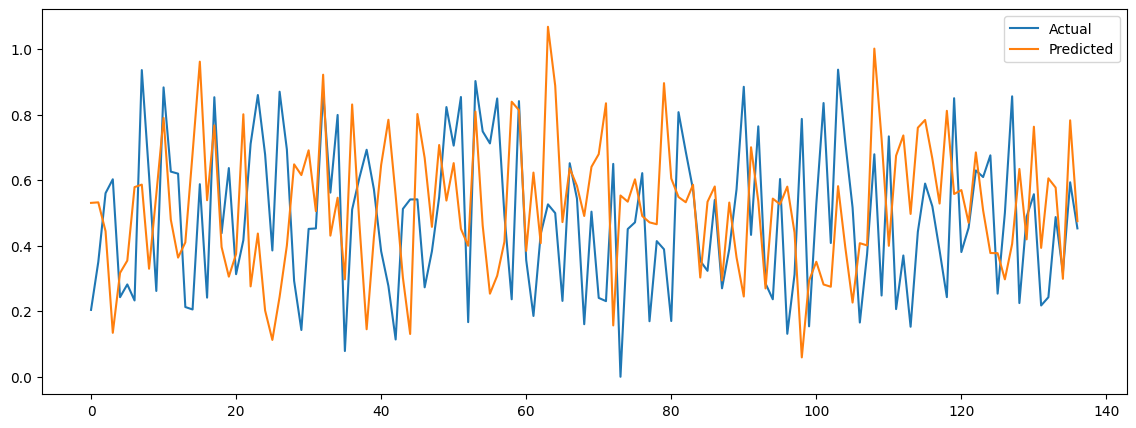

In [13]:
# Upload the CSV file from your local machine
from google.colab import files
uploaded = files.upload()

# Assuming the file is named 'day.csv'
data = pd.read_csv('day.csv')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('day.csv')

# Select all relevant features to include in the model
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Separate the already normalized features
normalized_features = ['temp', 'atemp', 'hum', 'windspeed']
non_normalized_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'cnt']

# Scale the non-normalized features
scaler = MinMaxScaler()
data[non_normalized_features] = scaler.fit_transform(data[non_normalized_features])

# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(data[features], test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Function to create sequences
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :-1])
        y.append(data[i + time_steps, -1])
    return np.array(X), np.array(y)

time_steps = 10
X_train, y_train = create_sequences(train_data.values, time_steps)
X_val, y_val = create_sequences(val_data.values, time_steps)
X_test, y_test = create_sequences(test_data.values, time_steps)

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(time_steps, X_train.shape[2])))
rnn_model.add(Dense(1))

# Compile the model with a custom learning rate
custom_learning_rate = 0.001  # Specify your desired learning rate here
optimizer = Adam(learning_rate=custom_learning_rate)

rnn_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the RNN model
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the RNN model
rnn_predictions = rnn_model.predict(X_test)
rnn_mse = np.mean((rnn_predictions - y_test) ** 2)
print(f'RNN Mean Squared Error: {rnn_mse}')

# Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual')
plt.plot(rnn_predictions, label='Predicted')
plt.legend()
plt.show()
